<a href="https://colab.research.google.com/github/Farzadmoghaddam/Intelligent-Systems/blob/main/Mini%20Projects/Mini%20Project1/MiniProject1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#installing the "gdown" library and downloading the dataset from Google Drive by it's ID

In [1]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1TnOsuoA4Cy6dOjgRM1JoTQUxtdWQ2EmC

Downloading...
From: https://drive.google.com/uc?id=1TnOsuoA4Cy6dOjgRM1JoTQUxtdWQ2EmC
To: /content/BankChurners.csv
100% 1.21M/1.21M [00:00<00:00, 26.9MB/s]


#import important libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
df.shape

(10127, 21)

#Q1.2

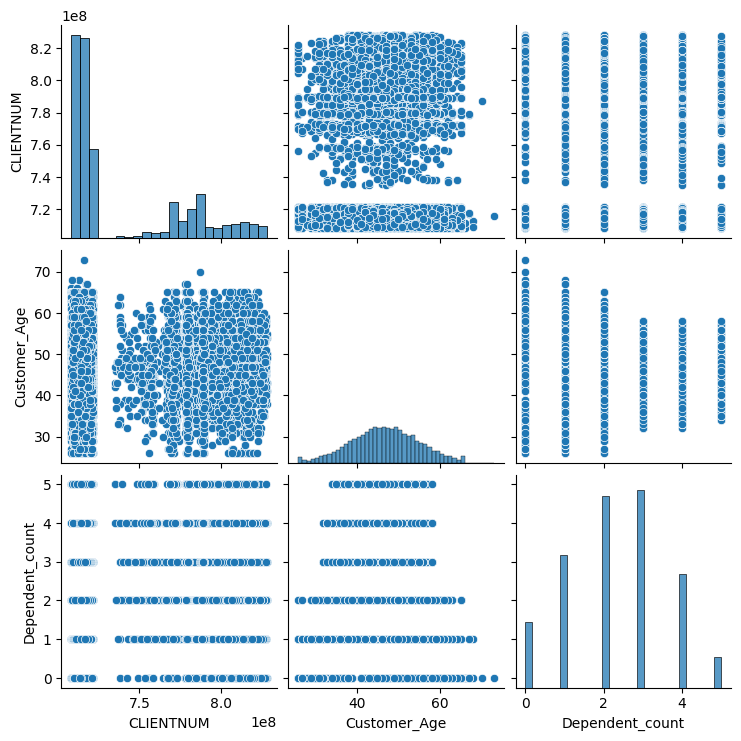

In [ ]:
cols = df.columns[:5]
sns.pairplot(df[cols])
plt.show()

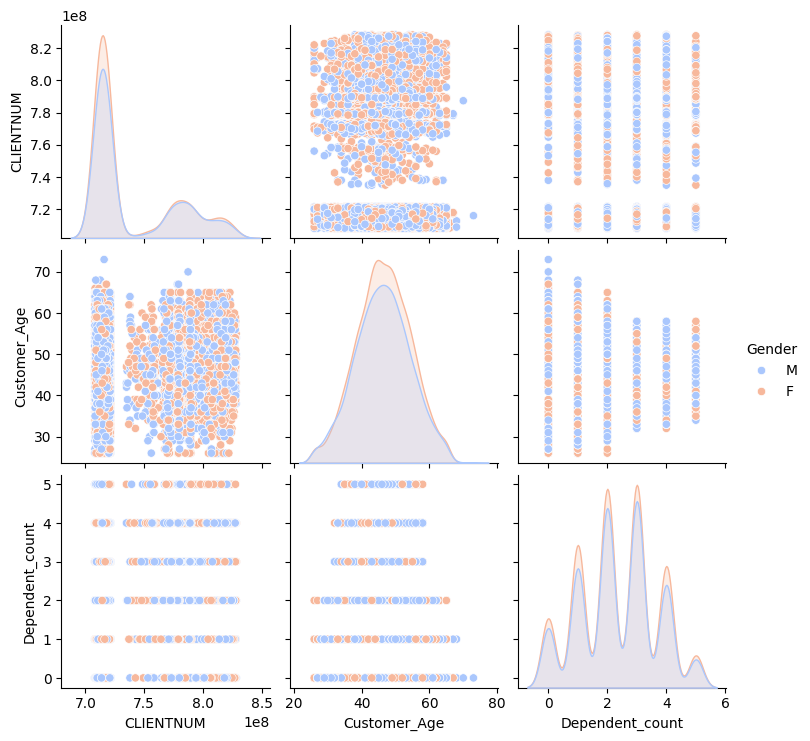

In [ ]:
cols = df.columns[:5]
sns.pairplot(df[cols] ,hue='Gender',palette='coolwarm')
plt.show()

#Q1.3

In [ ]:
df['Gender'].value_counts()

,count
Gender,
F,5358
M,4769


In [ ]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
df[['Gender', 'Marital_Status']].head()

,Gender,Marital_Status
0,1,1
1,0,2
2,1,1
3,0,3
4,1,1


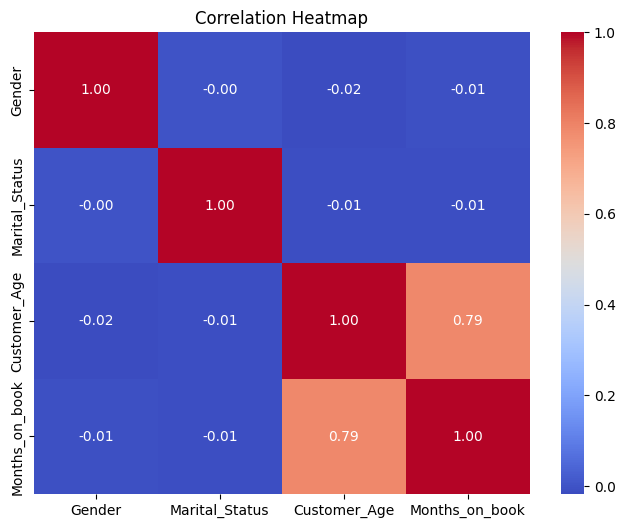

In [ ]:
# Select the four columns for the correlation heatmap
cols_for_heatmap = ['Gender', 'Marital_Status', 'Customer_Age', 'Months_on_book']
correlation_matrix = df[cols_for_heatmap].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#Q1.4

In [11]:
df = df[~df.apply(lambda row: row.astype(str).str.contains('Unknown').any(), axis=1)]

In [12]:
df.shape

(7081, 21)

#Q1.5

In [ ]:
attrition_counts = df['Attrition_Flag'].value_counts()
attrition_counts

,count
Attrition_Flag,
Existing Customer,5968
Attrited Customer,1113


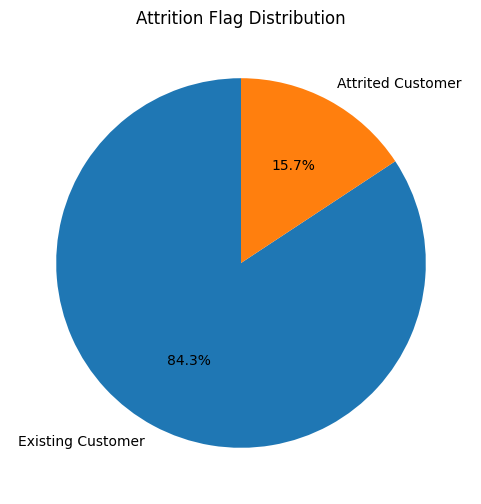

In [ ]:
   plt.figure(figsize=(6, 6))  # Adjust figure size as needed
   plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
   plt.title('Attrition Flag Distribution')
   plt.show()

#Q1.6.1

In [13]:
df['Attrition_Flag'] = le.fit_transform(df['Attrition_Flag'])
df['Education_Level'] = le.fit_transform(df['Education_Level'])
df['Income_Category'] = le.fit_transform(df['Income_Category'])
df['Card_Category'] = le.fit_transform(df['Card_Category'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])


In [14]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,1,3,3,1,2,0,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,1,3,2,1,3,0,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,1,40,1,3,5,1,2,0,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,1,44,1,2,2,1,1,0,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [15]:
df.shape

(7081, 21)

In [16]:
x = df.drop('Attrition_Flag', axis=1)
y= df['Attrition_Flag']

In [17]:
x.shape

(7081, 20)

In [18]:
y.shape

(7081,)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaler.fit(x)
standardized_data = scaler.transform(x)
x = standardized_data

In [48]:
from sklearn.model_selection import train_test_split
x_main,x_test,y_main,y_test = train_test_split(x,y,test_size=0.15,random_state=53)
x_train,x_val,y_train,y_val = train_test_split(x_main,y_main,test_size=0.15,random_state=53)

In [49]:
x_train.shape

(5115, 20)

In [50]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=53)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=53, ...)

In [51]:
y_pred_train = xgb_classifier.predict(x_train)
acuuracy_train = accuracy_score(y_train, y_pred_train)
print("train acuuracy is" , acuuracy_train)
print(classification_report(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))


train acuuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       815
           1       1.00      1.00      1.00      4300

    accuracy                           1.00      5115
   macro avg       1.00      1.00      1.00      5115
weighted avg       1.00      1.00      1.00      5115

[[ 815    0]
 [   0 4300]]


In [52]:
y_pred_test = xgb_classifier.predict(x_test)
acuuracy_test = accuracy_score(y_test, y_pred_test)
print("test acuuracy is" , acuuracy_test)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))


test acuuracy is 0.9717779868297272
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       158
           1       0.98      0.99      0.98       905

    accuracy                           0.97      1063
   macro avg       0.95      0.93      0.94      1063
weighted avg       0.97      0.97      0.97      1063

[[139  19]
 [ 11 894]]


In [47]:
y_pred_val = classifier.predict(x_val)
acuuracy_val = accuracy_score(y_val, y_pred_val)
print("validation acuuracy is" , acuuracy_val)

print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

validation acuuracy is 0.8983050847457628
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       227
           1       0.91      0.97      0.94      1189

    accuracy                           0.90      1416
   macro avg       0.84      0.74      0.78      1416
weighted avg       0.89      0.90      0.89      1416

[[ 117  110]
 [  34 1155]]


#Q1.6.2

In [53]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
1,5968
0,1113


In [54]:
Existing = df[df.Attrition_Flag == 1]
Attrited= df[df.Attrition_Flag == 0]

In [55]:
print(Existing.shape)
print(Attrited.shape)

(5968, 21)
(1113, 21)


In [56]:
Existing_New = Existing.sample(n=1113, random_state=None, replace=False, weights=None)

In [57]:
print(Existing_New.shape)
print(Attrited.shape)

(1113, 21)
(1113, 21)


In [58]:
new_df = pd.concat([Existing_New, Attrited], axis=0)
new_df.shape

(2226, 21)

In [59]:
x_new = new_df.drop('Attrition_Flag', axis=1)
y_new= new_df['Attrition_Flag']

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_new)
standardized_data = scaler.transform(x_new)
x_new = standardized_data

In [61]:
print(x_new.shape)
print(y_new.shape)

(2226, 20)
(2226,)


In [62]:
from sklearn.model_selection import train_test_split

In [65]:
x_main_new,x_test_new,y_main_new,y_test_new = train_test_split(x_new,y_new,test_size=0.2,random_state=53)

In [66]:
x_train_new,x_val_new,y_train_new,y_val_new = train_test_split(x_main_new,y_main_new,test_size=0.2,random_state=53)

In [68]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=53)
xgb_classifier.fit(x_train_new, y_train_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=53, ...)

In [67]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
y_pred_train_new = xgb_classifier.predict(x_train_new)
acuuracy_train_new = accuracy_score(y_train_new, y_pred_train_new)
print("new train acuuracy is" , acuuracy_train_new)
print(classification_report(y_train_new, y_pred_train_new))
print(confusion_matrix(y_train_new, y_pred_train_new))


new train acuuracy is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       714
           1       1.00      1.00      1.00       710

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424

[[714   0]
 [  0 710]]


In [74]:
y_pred_test_new = xgb_classifier.predict(x_test_new)
acuuracy_test_new = accuracy_score(y_test_new, y_pred_test_new)
print("new test acuuracy is" , acuuracy_test_new)
print(classification_report(y_test_new, y_pred_test_new))
print(confusion_matrix(y_test_new, y_pred_test_new))


new test acuuracy is 0.968609865470852
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       224
           1       0.96      0.98      0.97       222

    accuracy                           0.97       446
   macro avg       0.97      0.97      0.97       446
weighted avg       0.97      0.97      0.97       446

[[215   9]
 [  5 217]]


In [75]:
y_pred_val_new = xgb_classifier.predict(x_val_new)
acuuracy_val_new = accuracy_score(y_val_new, y_pred_val_new)
print("new val acuuracy is" , acuuracy_val_new)
print(classification_report(y_val_new, y_pred_val_new))
print(confusion_matrix(y_val_new, y_pred_val_new))

new val acuuracy is 0.952247191011236
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       175
           1       0.96      0.94      0.95       181

    accuracy                           0.95       356
   macro avg       0.95      0.95      0.95       356
weighted avg       0.95      0.95      0.95       356

[[168   7]
 [ 10 171]]
